<a href="https://colab.research.google.com/github/nkr9/Deep-learning-experiment/blob/main/CNN_transfer_learningipynb_resnet_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 7: Image Classification using Transfer Learning

 ---


### 1. Fine-tuning VGG16

In [ ]:
ls


sample_data/


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajsekharchakraborty","key":"d04e2308ded89350bbe8da4c8bcb2911"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
import kagglehub

# Download latest version
data = kagglehub.dataset_download("rahimanshu/cardiomegaly-disease-prediction-using-cnn")

print("Path to dataset files:", data)

100%|██████████| 61.7M/61.7M [00:03<00:00, 17.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rahimanshu/cardiomegaly-disease-prediction-using-cnn/versions/1


In [ ]:
!kaggle datasets download -d "rahimanshu/cardiomegaly-disease-prediction-using-cnn"

Dataset URL: https://www.kaggle.com/datasets/rahimanshu/cardiomegaly-disease-prediction-using-cnn
License(s): CC0-1.0
  0% 0.00/61.7M [00:00<?, ?B/s]
100% 61.7M/61.7M [00:00<00:00, 1.41GB/s]


In [ ]:
import zipfile
zip_data = zipfile.ZipFile('/content/cardiomegaly-disease-prediction-using-cnn.zip','r')
zip_data.extractall('/content')
zip_data.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(64,64,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64,64)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64,64)
)

Found 4438 files belonging to 2 classes.
Found 1114 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.6025 - loss: 0.6602 - val_accuracy: 0.6831 - val_loss: 0.5861
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7056 - loss: 0.5662 - val_accuracy: 0.6822 - val_loss: 0.5941
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7430 - loss: 0.5211 - val_accuracy: 0.7199 - val_loss: 0.5370
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7620 - loss: 0.4909 - val_accuracy: 0.7262 - val_loss: 0.5159
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7770 - loss: 0.4686 - val_accuracy: 0.7244 - val_loss: 0.5184
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7981 - loss: 0.4438 - val_accuracy: 0.7127 - val_loss: 0.5391
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8073 - loss: 0.4176 - val_accuracy: 0.7172 - val_loss: 0.5699
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8277 - loss: 0.3981 - val_acc

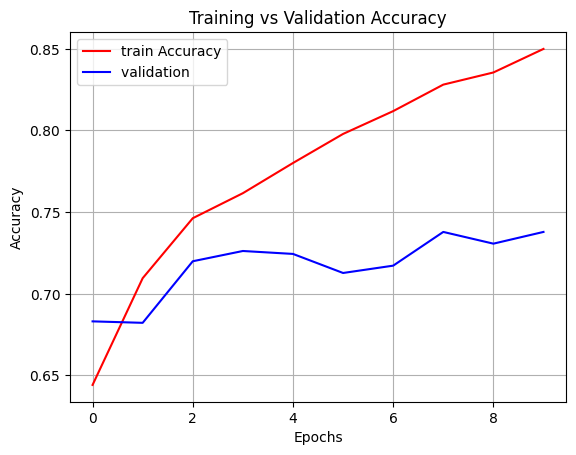

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train Accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation ')


plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

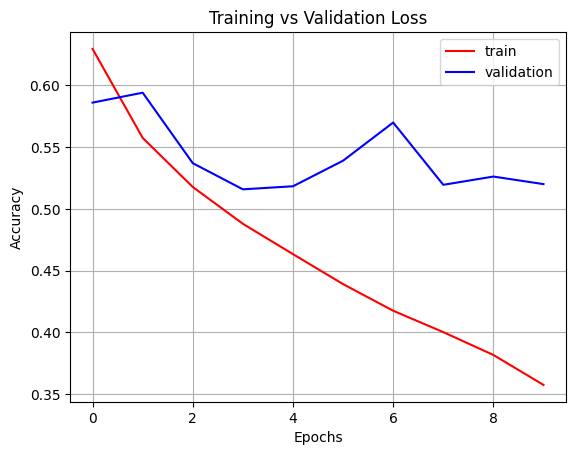

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install opencv-python
import cv2
import numpy as np

In [ ]:
import os
import pandas as pd

TypeError: Image data of dtype object cannot be converted to float

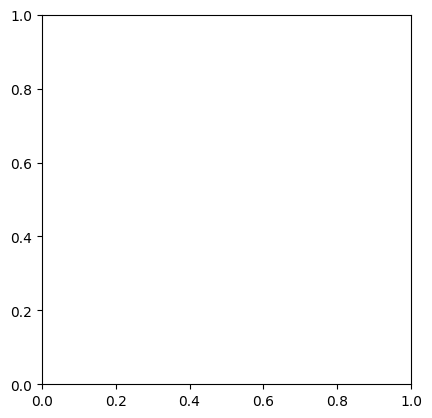

In [ ]:
test1_image = cv2.imread("/content/with_cardiomegaly.jpg")
plt.imshow(test1_image)
test1_image.shape
test1_image =cv2.resize(test1_image,(64,64))

In [ ]:
test1_image_rgb = cv2.cvtColor(test1_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(test1_image_rgb)
plt.axis('off')
plt.show()

# Resize
test1_image_resized = cv2.resize(test1_image, (64, 64))
print("Resized image shape:", test1_image_resized.shape)

IndentationError: unexpected indent (<ipython-input-36-0eec1271782d>, line 4)

In [ ]:
test1_image = np.expand_dims(test1_image, axis=0)
test1_image = test1_image/255.0
pred = model.predict(test1_image)
if pred[0][0] > 0.5:
  print("Cardiomegaly")
else:
  print("No Cardiomegaly")

In [ ]:
test2_image = cv2.imread("/content/normal.jpg")
plt.imshow(test2_image)
test2_image.shape
test2_image =cv2.resize(test2_image,(64,64))

In [ ]:
test2_image = np.expand_dims(test2_image, axis=0)
test2_image = test2_image/255.0
pred = model.predict(test2_image)
if pred[0][0] > 0.5:
  print("Cardiomegaly")
else:
  print("No Cardiomegaly")

With augmentation

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(64,64,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model2 = Sequential()

model2.add(conv_base)
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train/train',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test/test',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

Found 4438 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


In [ ]:
model2.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history2 = model2.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.5757 - loss: 0.6729 - val_accuracy: 0.6562 - val_loss: 0.6093
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.6835 - loss: 0.5934 - val_accuracy: 0.6795 - val_loss: 0.6071
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6949 - loss: 0.5771 - val_accuracy: 0.7020 - val_loss: 0.5804
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.6936 - loss: 0.5707 - val_accuracy: 0.7110 - val_loss: 0.5865
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7213 - loss: 0.5340 - val_accuracy: 0.7145 - val_loss: 0.5566
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7199 - loss: 0.5414 - val_accuracy: 0.7020 - val_loss: 0.5752
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.7261 - loss: 0.5376 - val_accuracy: 0.7136 - val_loss: 0.5676
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.7200 - loss: 0.5369 - val_accuracy

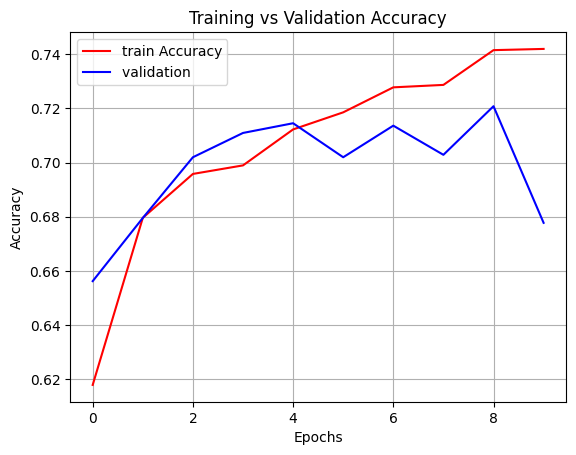

In [ ]:
plt.plot(history2.history['accuracy'],color='red',label='train Accuracy')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation ')


plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

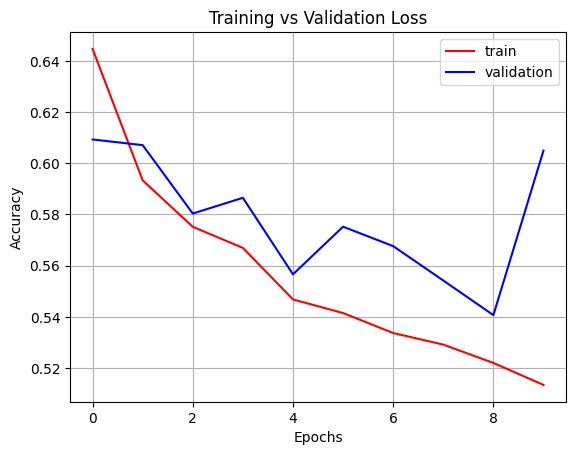

In [ ]:
plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
# Resize and preprocess
test1_image = cv2.imread("/content/img1.png")
test1_image = cv2.resize(test1_image, (64, 64))
test1_image = cv2.cvtColor(test1_image, cv2.COLOR_BGR2RGB)

# Normalize (optional, depending on how your model was trained)
test1_image = test1_image / 255.0

# Add batch dimension
input_image = np.expand_dims(test1_image, axis=0)

# Predict
pred = model2.predict(input_image)

if pred[0][0] > 0.5:
    print("Cardiomegaly")
else:
    print("No Cardiomegaly")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
No Cardiomegaly


In [ ]:
# Resize and preprocess
test2_image = cv2.imread("/content/img2.png")
test2_image = cv2.resize(test2_image, (64, 64))
test2_image = cv2.cvtColor(test2_image, cv2.COLOR_BGR2RGB)

# Normalize (optional, depending on how your model was trained)
test1_image = test2_image / 255.0

# Add batch dimension
input_image = np.expand_dims(test2_image, axis=0)

# Predict
pred = model2.predict(input_image)

if pred[0][0] > 0.5:
    print("Cardiomegaly")
else:
    print("No Cardiomegaly")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
No Cardiomegaly


In [ ]:
# Resize and preprocess
test1_image = cv2.imread("/content/img1.png")
test1_image = cv2.resize(test1_image, (64, 64))
test1_image = cv2.cvtColor(test1_image, cv2.COLOR_BGR2RGB)

# Normalize (optional, depending on how your model was trained)
test1_image = test1_image / 255.0

# Add batch dimension
input_image = np.expand_dims(test1_image, axis=0)

# Predict
pred = model2.predict(input_image)

if pred[0][0] > 0.5:
    print("Cardiomegaly")
else:
    print("No Cardiomegaly")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
No Cardiomegaly


In [ ]:
plt.imshow(test2_image)
pred = model2.predict(test2_image)
if pred[0][0] > 0.5:
  print("Cardiomegaly")
else:
  print("No Cardiomegaly")

## Fine Tuning using ResNet152
- ResNet152 is a deep convolutional neural network with 152 layers from the ResNet family, designed to tackle the vanishing gradient problem in very deep networks. Its key innovation is the use of residual (skip) connections that let the network learn residual functions, enabling effective training of very deep architectures.
- It starts with a 7×7 convolution and max pooling, uses bottleneck residual blocks with three layers each (1×1, 3×3, 1×1 convolutions) to reduce and restore dimensions efficiently.
- Block distribution: 3 blocks (conv2_x), 8 blocks (conv3_x), 36 blocks (conv4_x), and 3 blocks (conv5_x).

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.resnet_v2 import ResNet152V2

### 1. Initializing the ResNet152V2 Convolutional Base for Transfer Learning

In [ ]:
conv_base = ResNet152V2(
    weights='imagenet',
    include_top = False,
    input_shape=(64,64,3)
)

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


### 2. Creating Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_out':  # Choose the block to start fine-tuning
        set_trainable = True
    layer.trainable = set_trainable

for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_layer_4 False
conv1_pad False
conv1_conv False
pool1_pad False
pool1_pool False
conv2_block1_preact_bn False
conv2_block1_preact_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_pad False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_out False
conv2_block2_preact_bn False
conv2_block2_preact_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_pad False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_out False
conv2_block3_preact_bn False
conv2_block3_preact_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_pad False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
max_pooling2d False
conv2_block3_3_conv False
conv2_block3_out False
conv3_bloc

In [ ]:
conv_base.summary()

Model: "resnet152v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 16, 16,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 18, 18,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 16, 16,    │          0 │ conv2_block1_0_c

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 8,933,376 (34.08 MB)

 Non-trainable params: 49,398,272 (188.44 MB)

### 3. Creating Model architecture

In [ ]:
from tensorflow.keras.layers import Dropout,BatchNormalization

Rmodel = Sequential()

Rmodel.add(conv_base)
Rmodel.add(Flatten())
Rmodel.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01))) #added l2 regularizer
Rmodel.add(Dropout(0.5)) #added dropout
Rmodel.add(Dense(1, activation='sigmoid'))


### 4. Data Augmentation

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train/train',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test/test',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

Found 4438 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


### 5. Compilation of Model

In [ ]:
Rmodel.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
historyR = Rmodel.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator, callbacks = [early_stopping])

Epoch 1/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 65s 257ms/step - accuracy: 0.5080 - loss: 5.8820 - val_accuracy: 0.5557 - val_loss: 5.5334
Epoch 2/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.5382 - loss: 5.6275 - val_accuracy: 0.5718 - val_loss: 5.3678
Epoch 3/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.5660 - loss: 5.4217 - val_accuracy: 0.5898 - val_loss: 5.2132
Epoch 4/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.5608 - loss: 5.2544 - val_accuracy: 0.5969 - val_loss: 5.0640
Epoch 5/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.5638 - loss: 5.0496 - val_accuracy: 0.6005 - val_loss: 4.9205
Epoch 6/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.5847 - loss: 4.8919 - val_accuracy: 0.6050 - val_loss: 4.7706
Epoch 7/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.5765 - loss: 4.7496 - val_accuracy: 0.5907 - val_loss: 4.6231
Epoch 8/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.5921 - loss: 4.5815 -

### 6. Accuracy Plot

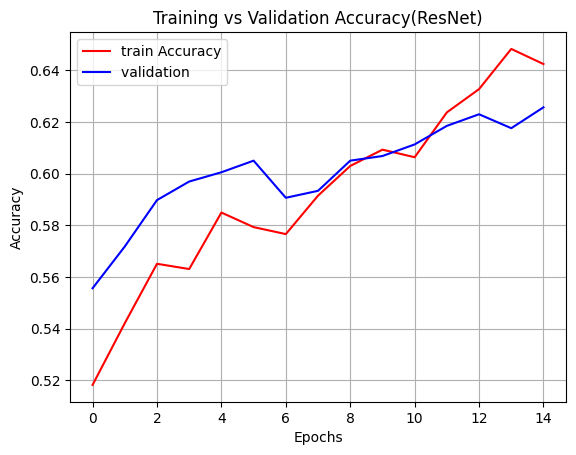

In [ ]:
import matplotlib.pyplot as plt

plt.plot(historyR.history['accuracy'],color='red',label='train Accuracy')
plt.plot(historyR.history['val_accuracy'],color='blue',label='validation ')


plt.title('Training vs Validation Accuracy(ResNet)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### 7. Loss Plot

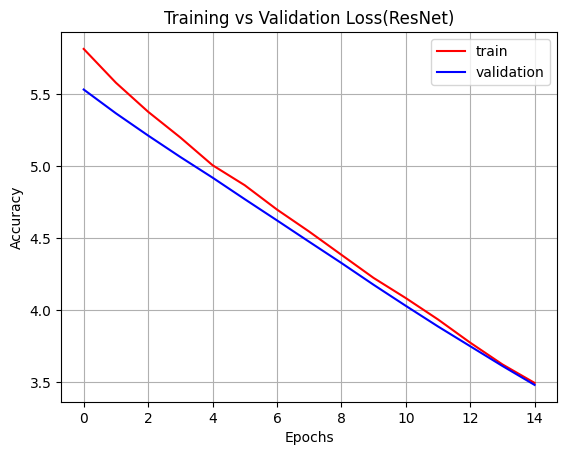

In [ ]:
plt.plot(historyR.history['loss'],color='red',label='train')
plt.plot(historyR.history['val_loss'],color='blue',label='validation')

plt.title('Training vs Validation Loss(ResNet)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### 8. Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Cardiomegaly


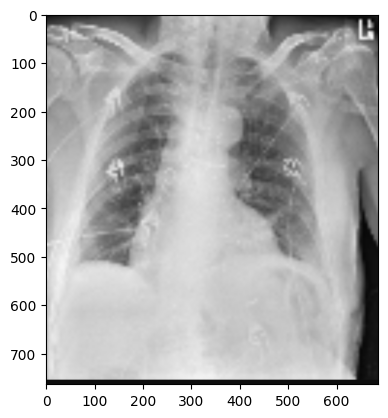

In [ ]:
with_cardiomegaly = cv2.imread("/content/img1.png")
plt.imshow(with_cardiomegaly)
test1_image =cv2.resize(with_cardiomegaly,(64,64))
test1_image = np.expand_dims(test1_image, axis=0)
test1_image = test1_image/255.0
pred = Rmodel.predict(test1_image)
if pred[0][0] > 0.5:
  print("Cardiomegaly")
else:
  print("No Cardiomegaly")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
No Cardiomegaly


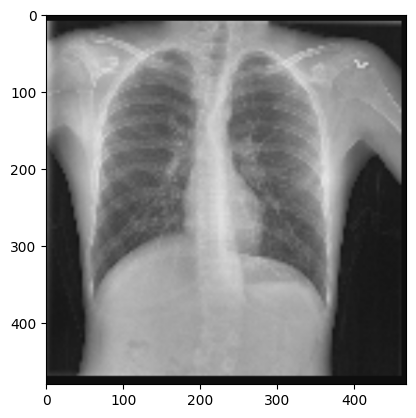

In [ ]:
normal = cv2.imread("/content/img2.png")
plt.imshow(normal)

test2_image =cv2.resize(normal,(64,64))
test2_image = np.expand_dims(test2_image, axis=0)
test2_image = test2_image/255.0
pred =Rmodel.predict(test2_image)
if pred[0][0] > 0.5:
  print("Cardiomegaly")
else:
  print("No Cardiomegaly")

## Conclusion:
The ResNet model shows moderate accuracy (~63%) on both training and validation sets, with similar loss values, indicating reasonable but not high performance. The close training and validation metrics suggest the model is not overfitting but might need further tuning, more data, or different hyperparameters to improve accuracy and reduce loss.